<a href="https://colab.research.google.com/github/caplove/DX_team_4_repo/blob/main/Team_4_Augment_DNN_simple2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3월 진행현황

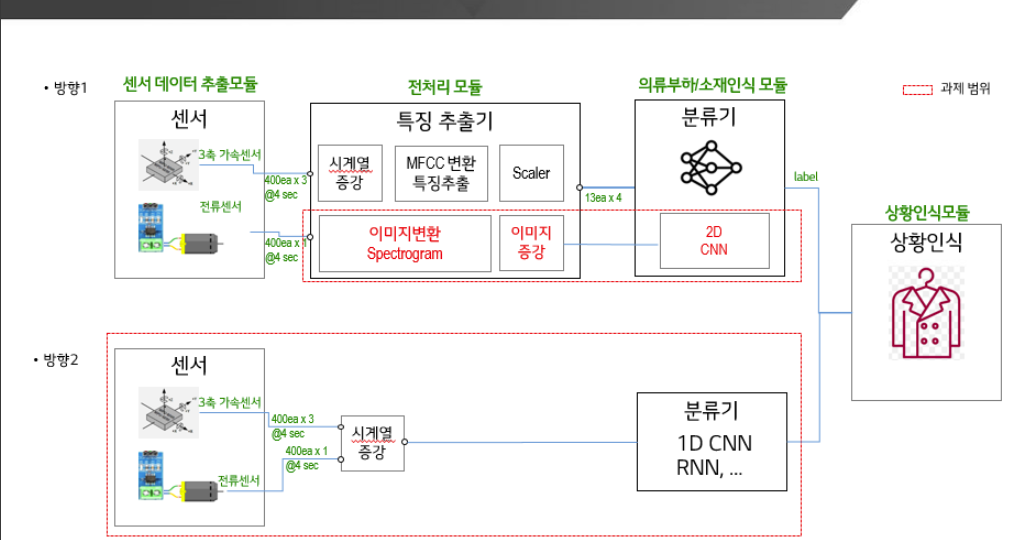

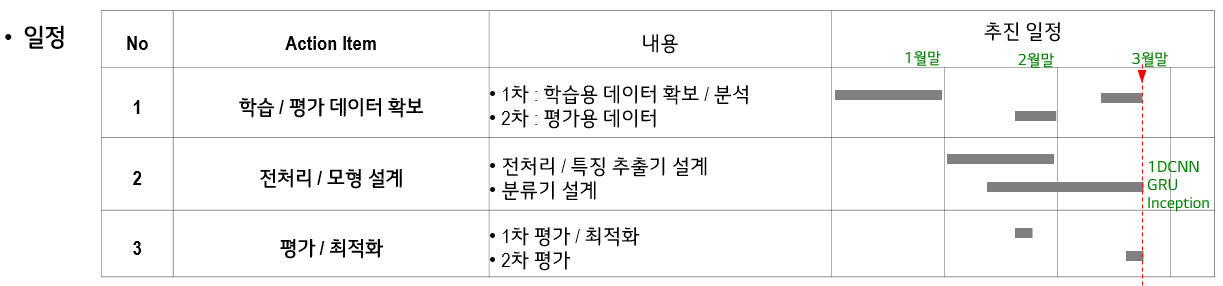

# **데이터 가져오기**

---



In [1]:
collab_en=1  # google collab 이면 1, local 이면 0

In [ ]:
if collab_en:
  !git clone https://github.com/caplove/DX_team_4_repo.git

Cloning into 'DX_team_4_repo'...
remote: Enumerating objects: 459, done.
remote: Counting objects: 100% (459/459), done.
remote: Compressing objects: 100% (439/439), done.
remote: Total 459 (delta 240), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (459/459), 16.63 MiB | 5.53 MiB/s, done.
Resolving deltas: 100% (240/240), done.


In [ ]:
#과제 설명
from IPython.display import Image
#Image('./image/image_01.png',width=800,height=600)

In [ ]:
import sys

if collab_en:
  sys.path.append('/content/DX_team_4_repo')  # google collab
else:
  sys.path.append('./')                     # local


# 모듈과 함수 불러오기


In [ ]:
"""모듈 / 함수 불러오기 """
from augment_import2 import augment2
from extractor_import import extractor
#from models_import import my_models
# from models_import2 import my_models
from models_import3 import my_models_2

from data_import import import_data_from_folder
import pandas as pd

## 데이터 구조

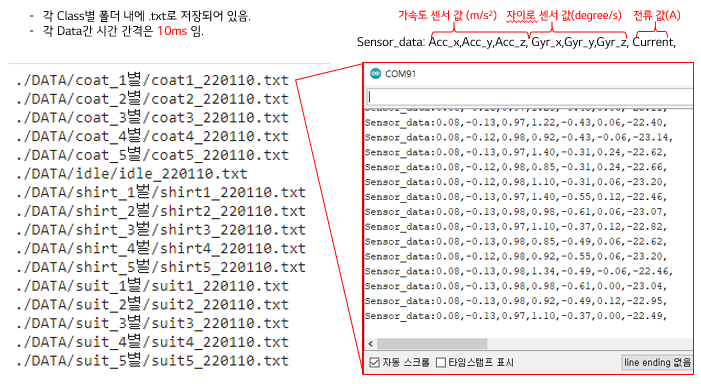

In [ ]:
"""데이터 import
# 훈련 / 검증 데이터 : Data  --> x,y
# 테스트 데이터 : Data_test  --> test_x, test_y
"""
if collab_en:
  FOLDER_NAME = "/DX_team_4_repo/Data"    # collab
else:
  FOLDER_NAME = "./Data"
x,y = import_data_from_folder(FOLDER_NAME)
print(x.shape,y.shape)

if collab_en:
  TEST_FOLDER_NAME = "/DX_team_4_repo/Data_test"  # collab
else:
  TEST_FOLDER_NAME = "./Data_test"
ext_x,ext_y = import_data_from_folder(TEST_FOLDER_NAME)
print(ext_x.shape,ext_y.shape)

""" 비어있는 데이터프레임 만들기"""
features_all = pd.DataFrame()
# jittering / MagWarp / Scaling / Combination
x_in_jittering = pd.DataFrame()
x_in_MagWarp = pd.DataFrame()
x_in_Scaling = pd.DataFrame()
x_in_Combination = pd.DataFrame()

.//DX_team_4_repo/Data//shirt_5.txt
.//DX_team_4_repo/Data//suit_4.txt
.//DX_team_4_repo/Data//coat_2.txt
.//DX_team_4_repo/Data//suit_2.txt
.//DX_team_4_repo/Data//shirt_1.txt
.//DX_team_4_repo/Data//idle.txt
.//DX_team_4_repo/Data//coat_1.txt
.//DX_team_4_repo/Data//suit_3.txt
.//DX_team_4_repo/Data//suit_5.txt
.//DX_team_4_repo/Data//coat_4.txt
.//DX_team_4_repo/Data//shirt_2.txt
.//DX_team_4_repo/Data//coat_3.txt
.//DX_team_4_repo/Data//shirt_4.txt
.//DX_team_4_repo/Data//shirt_3.txt
.//DX_team_4_repo/Data//suit_1.txt
.//DX_team_4_repo/Data//coat_5.txt
(274582, 7) (274582,)
.//DX_team_4_repo/Data_test/suit_1/suit_1.txt
.//DX_team_4_repo/Data_test/suit_3/suit_3.txt
.//DX_team_4_repo/Data_test/suit_2/suit_2.txt
.//DX_team_4_repo/Data_test/coat_1/coat_1.txt
.//DX_team_4_repo/Data_test/coat_5/coat_5.txt
.//DX_team_4_repo/Data_test/shirt_1/shirt_1.txt
.//DX_team_4_repo/Data_test/shirt_2/shirt_2.txt
.//DX_team_4_repo/Data_test/coat_3/coat_3.txt
.//DX_team_4_repo/Data_test/shirt_4/shirt_4

# 파라미터 설정

>> - 시계열 데이터 augmentation 종류

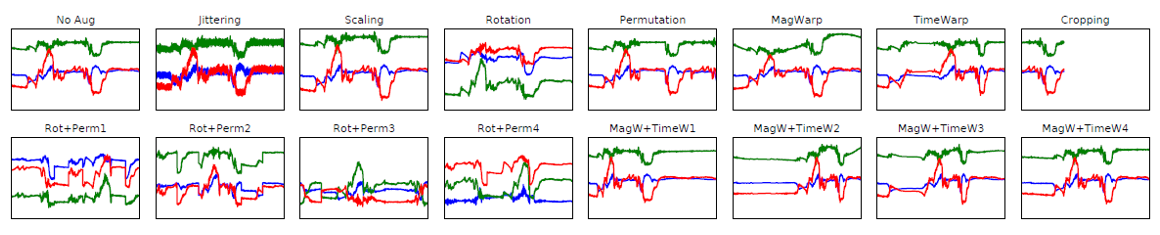



>> - external_test_data_use flag :
 * 0 : train과 test가 동일 set 에서 split 하여사용
 * 1 : 별도의 폴더(Data_test)에서 불러와서 사용 

>> - log_en : 0 (off), 1(on)


In [ ]:
"""Augmentation param 설정"""
# jitter_para_list = [0.01, 0.05, 0.1]  # sigma
# MW_para_list =     [0.01, 0.05, 0.1]  # sigma
# Scale_para_list =  [0.01, 0.05, 0.1]

# jitter_para_list = [0.01,0.1]  # sigma
# MW_para_list =     [0.01,0.1]  # sigma
# Scale_para_list =  [0.01,0.1]
jitter_para_list = [0.1]  # sigma
MW_para_list =     [0.1,0.01]  # sigma
Scale_para_list =  [0.1,0.01]

"""flag 설정"""
# 별도의 test data(Data_test폴더) 사용여부 결정  
external_test_data_use = 1  # 0 : Data 폴더에서 8:1:1로 split사용,   1:Data_test폴더의 데이터 사용 

# 그래프/결과값 보이기
log_en = 0   # 0 : 결과만 보임,  1 : 중간 과정 보임.

# Augment / 모델별 Accuracy
> - Augment Params : jitter, MagWarp, Scale 의 sigma값에 따라 모델의 정확도를 측정함. 
> - 모델 : DNN, MLP, DTree, KNN, AdaBoost, RandomForest

> - 함수설명

>>  - augment2(x,y,i,j,k,log_en)   
    - x,y : x,y DataFrame 
    - i,j,k : jitter,MW,Scale의 sigma값
    - log_en : 설명 데이터 출력 유/무 flag
    - return :x_in_jittering, x_in_MagWarp, x_in_Scaling, x_in_Combination


>>  - extractor(x,y,dataset_list,log_en
    - x,y : x,y DataFrame 
    - dataset_list : 증강 데이터 list  ex)  [x, x_증강1, x_증강2, ...]
    - return :features_all


>>  - my_models(features_all,log_en,external_test_data_use,features_test)
    - features_all : feature 값 DataFrame
    - external_test_data_use : Data_test 폴더의 데이터를 테스트데이터로 사용여부 flag
    - features_test : feature 값 DataFrame ( external_test_data_use = 1이면 사용됨) 
    - return : Acc_DNN,Acc_MLP,Acc_TREE,Acc_KNN,Acc_Ensemble, Acc_RForest

In [ ]:

# 빈 Accuracy.xls 만들기
# df = pd.DataFrame(columns=['jit','MW','Scale','DNN','MLP','DTree','KNN','AdaBoost','RandomForest'])
df = pd.DataFrame(columns=['jit','MW','Scale','CNN','GRU','Inception'])


# i,j,k는 각각 jitter, MagWarp, Scale의 sigma 값


for i in jitter_para_list:
    for j in MW_para_list:
        for k in Scale_para_list:
            
            print(f"jitter_sigma:{i},   MW_sigma:{j},   Scale_sigma:{k}")
            # augmentation 방법별로 원본 x와 동일 size의 데이터 생성
            x_in_jittering, x_in_MagWarp, x_in_Scaling, x_in_Combination = augment2(x,y,i,j,k,log_en)
            #print(x.shape, x_in_jittering.shape, x_in_MagWarp.shape, x_in_Scaling.shape, x_in_Combination.shape, y.shape)
            print("status: 데이터 증강 완료")

            # 증강 데이터 선정
            # dataset_list = [x]                                                               # default 데이터
            dataset_list = [x,x_in_jittering, x_in_MagWarp,x_in_Scaling, x_in_Combination]     # 증강    데이터
            # dataset_list = [x,x_in_jittering]     # 증강    데이터

            
            """Raw 데이터 기반 모든 모델에 대한 훈련 및 평가"""
            # Acc_1D_CNN_valid, Acc_1D_CNN, Acc_GRU_valid, Acc_GRU, Acc_Incpt_valid, Acc_Incpt = my_models_2(x,y,dataset_list,0,1,ext_x,ext_y)
            # print( Acc_1D_CNN_valid, Acc_1D_CNN, Acc_GRU_valid, Acc_GRU, Acc_Incpt_valid, Acc_Incpt)

            Acc_1D_CNN_valid, Acc_1D_CNN = my_models_2(x,y,dataset_list,0,1,ext_x,ext_y)
            print( Acc_1D_CNN_valid, Acc_1D_CNN)

            # print("status: 평가 완료")
            # print(f"1D_CNN: {Acc_1D_CNN:.3f}, GRU:{Acc_GRU:.3f}, Inception:{Acc_Incpt:.3f}")
            # print("----" * 30)
            
            # parameter별 Accuracy 데이터 저장
            # df=df.append({'jit':i,'MW':j,'Scale':k,'CNN':Acc_1D_CNN,'GRU':Acc_GRU,'Inception':Acc_Incpt},ignore_index=True)

            
            
            
            """Features 기반 모든 모델에 대한 훈련 및 평가"""
            """특징 종류 선정"""
            """특징 종류 1 : FFT"""
            # 원본 포함 증강된 데이터의 특징 추출하고 merge            
            # features_all = extractor_fft(x,y,dataset_list,log_en)
            
            """특징 종류 2 : MFCC"""
            # features_all = extractor(x,y,dataset_list,log_en)
            
            # 테스트 데이터 선정
            # dataset_list = [test_x]
            #           테스트 데이터의 특징 추출하고 merge 
            # features_test = extractor_fft(test_x,test_y,dataset_list,log_en)

            # print("status: Features 추출 완료")
            
            """"""  
            # Acc_DNN,Acc_MLP,Acc_TREE,Acc_KNN,Acc_Ensemble, Acc_RForest = my_models(features_all,log_en)
            # Acc_DNN,Acc_MLP,Acc_TREE,Acc_KNN,Acc_Ensemble, Acc_RForest = my_models(features_all,log_en,external_test_data_use,features_test)   # 별도 test 폴더 적용시 1
            # print("status: 모형 훈련/평가 완료")

            
            
            
#             print(f"DNN: {Acc_DNN:.3f}, MLP:{Acc_MLP:.3f}, DTree:{Acc_TREE:.3f}, KNN:{Acc_KNN:.3f}, AdaBoost: {Acc_Ensemble:.3f}, RandomForest: {Acc_RForest:.3f}")
#             print("----" * 30)

#             # parameter별 Accuracy 데이터 저장
#             df=df.append({'jit':i,'MW':j,'Scale':k,'DNN':Acc_DNN,'MLP':Acc_MLP,'DTree':Acc_TREE,'KNN':Acc_KNN,'AdaBoost':Acc_Ensemble,'RandomForest':Acc_RForest},ignore_index=True)


# GRU 결과
# jitter_sigma:0.01,   MW_sigma:0.01,   Scale_sigma:0.01
# status: 데이터 증강 완료
# (1098300, 7) (1098300, 1) (137260, 7) (137260, 1) (137350, 7) (137350, 1)
# STATUS : GRU 완료
# tensor(0.8251, device='cuda:0', dtype=torch.float64) tensor(0.5439, device='cuda:0', dtype=torch.float64)
# jitter_sigma:0.01,   MW_sigma:0.01,   Scale_sigma:0.1
# status: 데이터 증강 완료
# (1098300, 7) (1098300, 1) (137260, 7) (137260, 1) (137350, 7) (137350, 1)
# STATUS : GRU 완료
# tensor(0.8601, device='cuda:0', dtype=torch.float64) tensor(0.5965, device='cuda:0', dtype=torch.float64)
# jitter_sigma:0.01,   MW_sigma:0.1,   Scale_sigma:0.01
# status: 데이터 증강 완료
# (1098300, 7) (1098300, 1) (137260, 7) (137260, 1) (137350, 7) (137350, 1)
# STATUS : GRU 완료
# tensor(0.8105, device='cuda:0', dtype=torch.float64) tensor(0.6257, device='cuda:0', dtype=torch.float64)
# jitter_sigma:0.01,   MW_sigma:0.1,   Scale_sigma:0.1
# status: 데이터 증강 완료
# (1098300, 7) (1098300, 1) (137260, 7) (137260, 1) (137350, 7) (137350, 1)
# STATUS : GRU 완료
# tensor(0.8309, device='cuda:0', dtype=torch.float64) tensor(0.6550, device='cuda:0', dtype=torch.float64)
# jitter_sigma:0.1,   MW_sigma:0.01,   Scale_sigma:0.01
# status: 데이터 증강 완료
# (1098300, 7) (1098300, 1) (137260, 7) (137260, 1) (137350, 7) (137350, 1)
# STATUS : GRU 완료
# tensor(0.8222, device='cuda:0', dtype=torch.float64) tensor(0.5556, device='cuda:0', dtype=torch.float64)
# jitter_sigma:0.1,   MW_sigma:0.01,   Scale_sigma:0.1
# status: 데이터 증강 완료
# (1098300, 7) (1098300, 1) (137260, 7) (137260, 1) (137350, 7) (137350, 1)
# STATUS : GRU 완료
# tensor(0.8134, device='cuda:0', dtype=torch.float64) tensor(0.4912, device='cuda:0', dtype=torch.float64)
# jitter_sigma:0.1,   MW_sigma:0.1,   Scale_sigma:0.01
# status: 데이터 증강 완료
# (1098300, 7) (1098300, 1) (137260, 7) (137260, 1) (137350, 7) (137350, 1)
# STATUS : GRU 완료
# tensor(0.8309, device='cuda:0', dtype=torch.float64) tensor(0.6374, device='cuda:0', dtype=torch.float64)
# jitter_sigma:0.1,   MW_sigma:0.1,   Scale_sigma:0.1
# status: 데이터 증강 완료
# (1098300, 7) (1098300, 1) (137260, 7) (137260, 1) (137350, 7) (137350, 1)
# STATUS : GRU 완료
# tensor(0.7959, device='cuda:0', dtype=torch.float64) tensor(0.6082, device='cuda:0', dtype=torch.float64)



# Inception 결과
# itter_sigma:0.01,   MW_sigma:0.01,   Scale_sigma:0.01
# status: 데이터 증강 완료
# (1098300, 7) (1098300, 1) (137260, 7) (137260, 1) (137350, 7) (137350, 1)
# STATUS : Inception 완료
# tensor(0.8222, device='cuda:0', dtype=torch.float64) tensor(0.5088, device='cuda:0', dtype=torch.float64)
# jitter_sigma:0.01,   MW_sigma:0.01,   Scale_sigma:0.1
# status: 데이터 증강 완료
# (1098300, 7) (1098300, 1) (137260, 7) (137260, 1) (137350, 7) (137350, 1)
# STATUS : Inception 완료
# tensor(0.6880, device='cuda:0', dtype=torch.float64) tensor(0.5088, device='cuda:0', dtype=torch.float64)
# jitter_sigma:0.01,   MW_sigma:0.1,   Scale_sigma:0.01
# status: 데이터 증강 완료
# (1098300, 7) (1098300, 1) (137260, 7) (137260, 1) (137350, 7) (137350, 1)
# STATUS : Inception 완료
# # tensor(0.7813, device='cuda:0', dtype=torch.float64) tensor(0.4503, device='cuda:0', dtype=torch.float64)
# jitter_sigma:0.01,   MW_sigma:0.1,   Scale_sigma:0.1
# status: 데이터 증강 완료
# (1098300, 7) (1098300, 1) (137260, 7) (137260, 1) (137350, 7) (137350, 1)
# STATUS : Inception 완료
# tensor(0.6822, device='cuda:0', dtype=torch.float64) tensor(0.4269, device='cuda:0', dtype=torch.float64)

jitter_sigma:0.1,   MW_sigma:0.1,   Scale_sigma:0.1
status: 데이터 증강 완료
(1098300, 7) (1098300, 1) (137260, 7) (137260, 1) (137350, 7) (137350, 1)
STATUS : Inception 완료
tensor(0.7114, device='cuda:0', dtype=torch.float64) tensor(0.4211, device='cuda:0', dtype=torch.float64)
jitter_sigma:0.1,   MW_sigma:0.1,   Scale_sigma:0.01
status: 데이터 증강 완료
(1098300, 7) (1098300, 1) (137260, 7) (137260, 1) (137350, 7) (137350, 1)
STATUS : Inception 완료
tensor(0.7026, device='cuda:0', dtype=torch.float64) tensor(0.5789, device='cuda:0', dtype=torch.float64)
jitter_sigma:0.1,   MW_sigma:0.01,   Scale_sigma:0.1
status: 데이터 증강 완료
(1098300, 7) (1098300, 1) (137260, 7) (137260, 1) (137350, 7) (137350, 1)


In [ ]:
print(Acc_1D_CNN,Acc_GRU,Acc_Incpt)
Acc_1D_CNN.data.data

In [ ]:
import matplotlib.pyplot as plt

# print(features_all.tail())
# features_all2 = pd.concat([features_all.iloc[:,200:399]])


# features_all2 = pd.concat([features_all.iloc[:,200:399],features_all.iloc[:,600:799],features_all.iloc[:,1000:1199],features_all.iloc[:,1400:1599]])

features_all2 = pd.concat([features_all.iloc[:,200:399],features_all.iloc[:,600:799],features_all.iloc[:,-1]],ignore_index=True,axis=1)

# print(features_all2)
plt.figure(figsize=[12,6])
plt.plot(features_all2.iloc[222,:-1])
plt.plot(features_all2.iloc[522,:-1])
plt.plot(features_all2.iloc[22,:-1])
plt.plot(features_all2.iloc[-1,:-1])
plt.plot(features_all2.iloc[122,:-1])

import numpy as np
out = np.fft.fft(features_all)


# 분석

In [ ]:
"""분석"""

#graph_list = [0.01, 0.05, 0.1]   # df.jit에 따른 Accuracy 비교
graph_list = [0.01, 0.1]   # df.jit에 따른 Accuracy 비교
plt.figure(figsize=(10,5))
plt.title('models\' average accuracy')

for graph_list_item in graph_list:
    
    idx = df.jit == graph_list_item
    plt.plot(df.avg_accuracy[idx],label=f'augment(jitter_sigma={graph_list_item},MW,Scale)')
    
#plt.axhline(y=0.854, color='r',linestyle = 'dashed',label='no augment')
plt.axhline(y=0.514, color='r',linestyle = 'dashed',label='no augment')
plt.ylim([0.3, 1])
plt.legend(loc='lower left')

> - Training / Test set 이 동일 모집단에서 split 하여, 훈련 / 검증한 경우

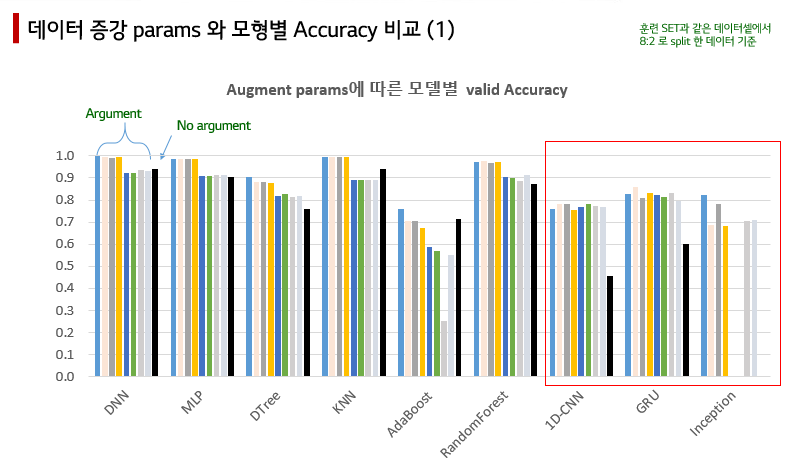

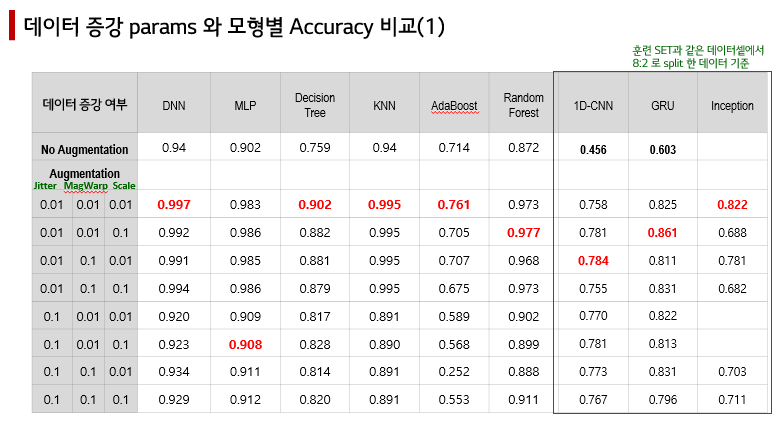

> - Test set을 다른 싯점에 구해서 검증한 경우




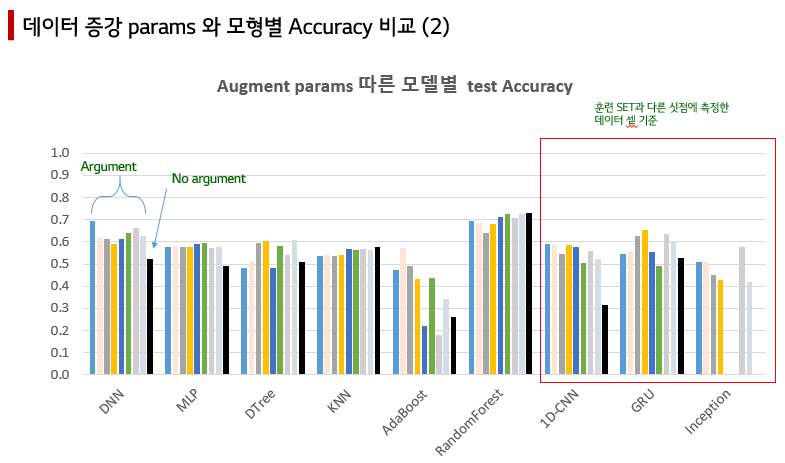

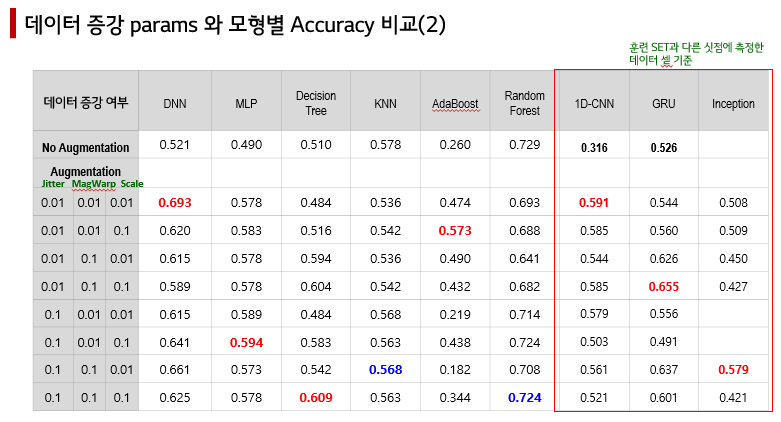

# 개선

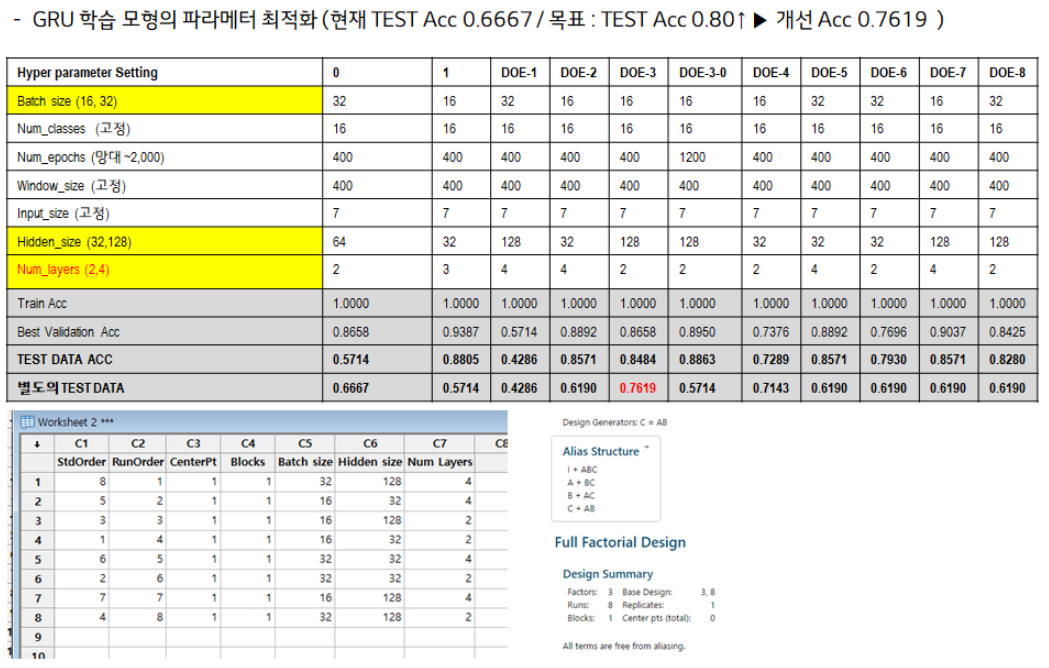